In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [3]:
train = pd.read_csv("data/train.csv")

print(train.shape)
train.head()

(2000, 2)


,filename,target
0,0.jpg,0
1,1.jpg,0
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [4]:
test = pd.read_csv("data/test.csv")

print(test.shape)
test.head()

(2000, 2)


,filename,target
0,0.jpg,0
1,1.jpg,0
2,2.jpg,0
3,3.jpg,0
4,4.jpg,1


## Load Images

In [5]:
# from matplotlib.pyplot import imread
from scipy.ndimage import imread

def load_images(filenames, default_path):
    images = []

    for filename in filenames:
        filepath = default_path + filename

        image = imread(filepath)
        images.append(image)

    images = np.array(images)

    return images

In [6]:
X_train = load_images(train["filename"], "data/train/")
X_train.shape

C:\anacondapython\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


(2000,)

In [7]:
X_test = load_images(test["filename"], "data/test/")
X_test.shape

C:\anacondapython\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


(2000,)

In [8]:
y_train = train["target"].values

print(y_train.shape)
y_train[0:10]

(2000,)


array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [9]:
y_test = test["target"].values

print(y_test.shape)
y_test[0:10]

(2000,)


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

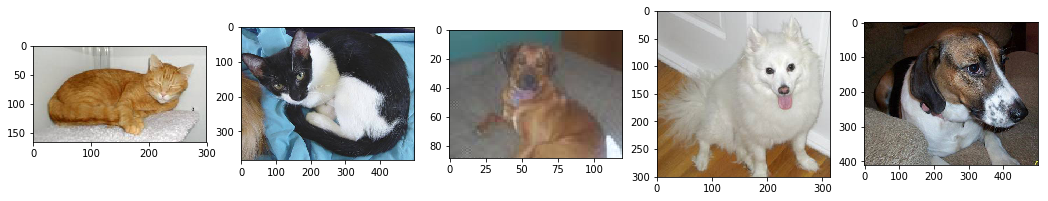

In [10]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_train[0])
axes[1].imshow(X_train[1])
axes[2].imshow(X_train[2])
axes[3].imshow(X_train[3])
axes[4].imshow(X_train[4])

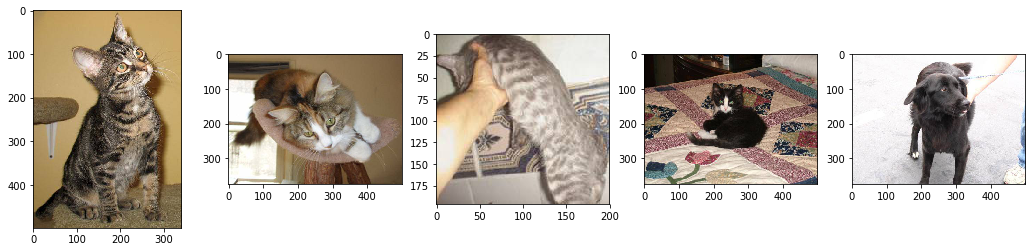

In [11]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_test[0])
axes[1].imshow(X_test[1])
axes[2].imshow(X_test[2])
axes[3].imshow(X_test[3])
axes[4].imshow(X_test[4])

## Preprocessing

### Resize Images

In [12]:
from tqdm import tqdm
from scipy.misc import imresize

def resize_image(original_images, size):
    resized_images = []
    
    for original_image in tqdm(original_images):
        resized_image = imresize(original_image, size)
        resized_images.append(resized_image)
        
    resized_images = np.array(resized_images)
    
    return resized_images

In [13]:
X_train_224 = resize_image(X_train, (224, 224))
X_train_224.shape

  0%|                                                                                         | 0/2000 [00:00<?, ?it/s]C:\anacondapython\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:17<00:00, 117.36it/s]


(2000, 224, 224, 3)

In [14]:
X_test_224 = resize_image(X_test, (224, 224))
X_test_224.shape

  0%|                                                                                         | 0/2000 [00:00<?, ?it/s]C:\anacondapython\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:34<00:00, 57.69it/s]


(2000, 224, 224, 3)

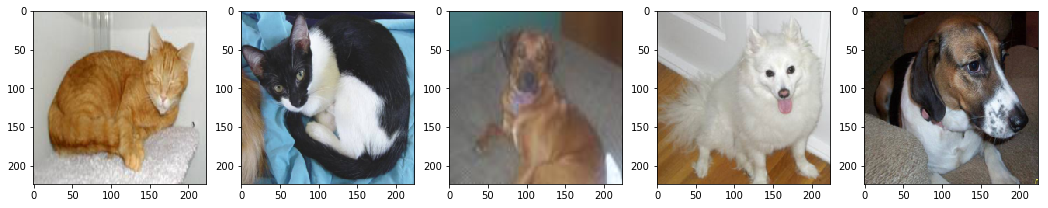

In [15]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_train_224[0])
axes[1].imshow(X_train_224[1])
axes[2].imshow(X_train_224[2])
axes[3].imshow(X_train_224[3])
axes[4].imshow(X_train_224[4])

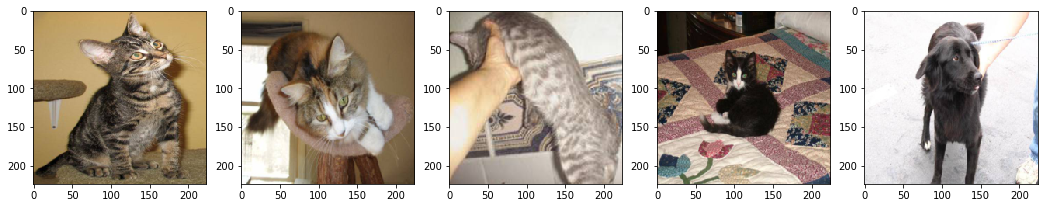

In [16]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_test_224[0])
axes[1].imshow(X_test_224[1])
axes[2].imshow(X_test_224[2])
axes[3].imshow(X_test_224[3])
axes[4].imshow(X_test_224[4])

## Build a Model

### CNN Model

In [17]:
# hidden: relu, ouput: sigmoid 사용
# relu: he, sigmoid: xavior initialization 사용
# padding ='same'=> 입력 출력 크기 같게 해줌
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def conv3x3(filters, input_shape = ()):
    return Conv2D(filters = filters, kernel_size = (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_uniform', input_shape = input_shape)

def maxpooling():
    return MaxPooling2D()

model = Sequential()
model.add(conv3x3(filters = 16, input_shape = (224,224,3)))
model.add(conv3x3(filters = 16))
model.add(maxpooling())
model.add(conv3x3(filters = 32))
model.add(conv3x3(filters = 32))
model.add(maxpooling())

model.add(Flatten())

model.add(Dense(units = 128, activation ='relu', kernel_initializer = 'he_uniform'))

model.add(Dense(units = 1, activation ='sigmoid', kernel_initializer = 'glorot_uniform'))

model.summary()

C:\anacondapython\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
__________

In [18]:
# Gradient Descent 사용
from keras.optimizers import SGD

optimizer = SGD(lr = 0.000001)

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
#model.fit(X_train_224, y_train, epochs = 10)

### VGG-16 w/ Pre-trained Model

In [20]:
# transfer learning은 weight만 가져오는것!

In [21]:
!pip install h5py

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [39]:
def conv3x3(filters, input_shape = ()):
    return Conv2D(filters = filters, kernel_size = (3,3), activation = 'relu', padding = 'same', trainable =False, input_shape = input_shape)
# 1. weight 초기화 필요없으므로 그 부분 제외(VGG 에서 가져옴)
# 2. trainable = False 해줘야함!!!!!!!!!!!!!!!!!!!!!!!!!!!!! => 마지막 layer만 학습하도록
# 3. VGG 구조 그대로 모델 구성해줌.
model = Sequential()
model.add(conv3x3(64, input_shape = (224,224,3)))
model.add(conv3x3(64))
model.add(maxpooling())
model.add(conv3x3(128))
model.add(conv3x3(128))
model.add(maxpooling())
model.add(conv3x3(256))
model.add(conv3x3(256))
model.add(conv3x3(256))
model.add(maxpooling())
model.add(conv3x3(512))
model.add(conv3x3(512))
model.add(conv3x3(512))
model.add(maxpooling())
model.add(conv3x3(512))
model.add(conv3x3(512))
model.add(conv3x3(512))
model.add(maxpooling())

# 다운받은 파일 가져옴
model.load_weights("vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")

# 마지막 layer를 학습가능하게 세팅(그앞은 기존w사용(trainable=False), output 개수 세팅)
model.add(Flatten())
model.add(Dense(units = 128, activation ='relu', kernel_initializer = 'he_uniform'))
model.add(Dense(units = 1, activation ='sigmoid', kernel_initializer = 'glorot_uniform'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 56, 56, 256)       295168    
__________

In [40]:
optimizer = SGD(lr = 0.0001, momentum = 0.9)
# lr은 VGG의 1/100정도인 0.0001로 설정

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [1]:
model.fit(X_train_224, y_train, epochs = 1)

In [42]:
model.save('cats_dogs_transfer_epoch1.h5')

## overfitting

### Augmentation

In [28]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rotation_range = 45, # 회전
                               width_shift_range= 0.3, # 옆으로 늘리기
                               height_shift_range = 0.3, # 위로 늘리기
                               zoom_range = (0.7, 1.3), # zoom in zoom out
                               horizontal_flip = True) # 옵션 계속 추가 가능 keras

generator

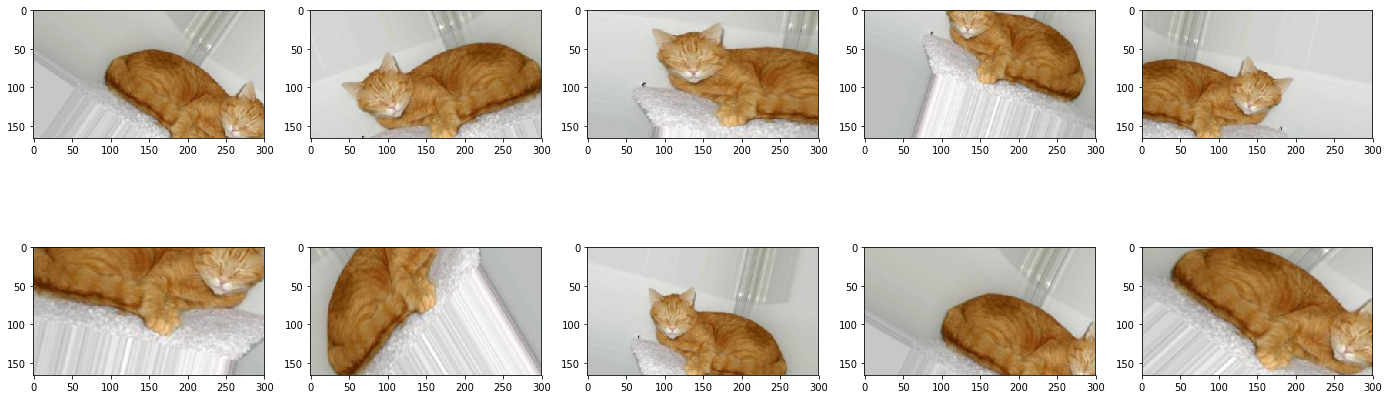

In [29]:
original_image = X_train[0]

transformed_images = [generator.random_transform(original_image) for _ in range(10) ] # generator 옵션 중 랜덤하게 적용하여 지정개수만큼 생성

figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(24,8)

axes[0][0].imshow(transformed_images[0])
axes[0][1].imshow(transformed_images[1])
axes[0][2].imshow(transformed_images[2])
axes[0][3].imshow(transformed_images[3])
axes[0][4].imshow(transformed_images[4])
axes[1][0].imshow(transformed_images[5])
axes[1][1].imshow(transformed_images[6])
axes[1][2].imshow(transformed_images[7])
axes[1][3].imshow(transformed_images[8])
axes[1][4].imshow(transformed_images[9])


### Dropout

In [43]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
def conv3x3(filters, input_shape = ()):
    return Conv2D(filters = filters, kernel_size = (3,3), activation = 'relu', padding = 'same', trainable =False, input_shape = input_shape)
# 1. weight 초기화 필요없으므로 그 부분 제외(VGG 에서 가져옴)
# 2. trainable = False 해줘야함!!!!!!!!!!!!!!!!!!!!!!!!!!!!! => 마지막 layer만 학습하도록
# 3. VGG 구조 그대로 모델 구성해줌.
model = Sequential()
model.add(conv3x3(64, input_shape = (224,224,3)))
model.add(conv3x3(64))
model.add(maxpooling())
model.add(conv3x3(128))
model.add(conv3x3(128))
model.add(maxpooling())
model.add(conv3x3(256))
model.add(conv3x3(256))
model.add(conv3x3(256))
model.add(maxpooling())
model.add(conv3x3(512))
model.add(conv3x3(512))
model.add(conv3x3(512))
model.add(maxpooling())
model.add(conv3x3(512))
model.add(conv3x3(512))
model.add(conv3x3(512))
model.add(maxpooling())

# 다운받은 파일 가져옴
model.load_weights("vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")

# 마지막 layer를 학습가능하게 세팅(그앞은 기존w사용(trainable=False), output 개수 세팅)
model.add(Flatten())
model.add(Dense(units = 128, activation ='relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation ='sigmoid', kernel_initializer = 'glorot_uniform'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 56, 56, 256)       295168    
__________

In [44]:
print(X_train_224.shape)
print(X_test_224.shape)

(2000, 224, 224, 3)
(2000, 224, 224, 3)


In [45]:
import numpy as np
optimizer = SGD(lr = 0.0001, momentum = 0.9)
# lr은 VGG의 1/100정도인 0.0001로 설정

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# X_train_224 = X_train_224
# X_test_224 = X_test_224

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range = 45, # 회전
                               width_shift_range= 0.3, # 옆으로 늘리기
                               height_shift_range = 0.3, # 위로 늘리기
                               zoom_range = (0.7, 1.3), # zoom in zoom out
                               horizontal_flip = True)

train_generator = train_datagen.flow(X_train_224,y_train, batch_size=30)

In [2]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=20)

In [34]:
model.save('cats_dogs_transfer_augmentation_dropout.h5')